In [1]:
!pip install "gymnasium[atari, accept-rom-license]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 29.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.8 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=fe2de5d9a9fb7bd75cea67f5734a4321051d70464ece33d12eb5406fe9dd0969
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


In [2]:
!pip install ale-py


In [4]:
import gym
env =gym.make('Pong-v0')


/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment Pong-v0 is out of date. You should consider upgrading to version `v4`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [45]:
import torch.nn as nn
import torch.optim as optim

def preprocess(image):
    image = image[35:195] # crop
    image = image[::2,::2,0] # downsample by factor of 2
    image[image == 144] = 0 # erase background (background type 1)
    image[image == 109] = 0 # erase background (background type 2)
    image[image != 0] = 1 # everything else (paddles, ball) just set to 1
    return torch.from_numpy(image.astype(float).ravel()).float()


class Agent:
    def __init__(self, n_states, n_hidden, n_actions, lr):

        self.net = nn.Sequential(nn.Linear(n_states, n_hidden),
                                 nn.ReLU(),
                                 nn.Linear(n_hidden, n_actions),
                                 nn.Softmax(dim=0))

        self.opt = optim.Adam(self.net.parameters(), lr=lr)

    def predict(self, observation):
        #state = torch.tensor(observation, dtype=torch.float32)
        state = observation
        actions = agent.net(state)

        return actions

    def update(self, loss):
        self.opt.zero_grad()
        loss.backward()
        self.opt.step()

agent = Agent(6400, 200, 2, 0.002)
optimizer = optim.Adam(policy.parameters(), lr=1e-3)
gamma = 0.99



In [46]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np

In [47]:
def discount_rewards(rewards, gamma=0.99):
    discounted = []
    R = 0
    for r in rewards[::-1]:
        R = r + gamma * R
        discounted.insert(0, R)

    discounted = np.array(discounted)
    normed = (discounted - discounted.mean())/discounted.std()

    return normed

In [48]:
# Question 2: Pong-v0
import gym
env =gym.make('Pong-v0')
reward_log = []
replay = {'actions':[], 'rewards':[]}

# Roll out 10 episdoes
for episode in range(100):
    print(f"Pong-v0, episode {episode}")
    # Initiate one episode
    prev_observation = None
    observation, info = env.reset()

    obs_history = []
    reward_history = []
    action_history = []

    terminated = False
    truncated = False

    # Roll out one episode
    while (not terminated):

        current_observation = preprocess(observation)
        difference = current_observation - prev_observation if prev_observation is not None else torch.zeros(80*80)
        prev_observation = current_observation

        action_ps = agent.predict(current_observation)
        action = torch.multinomial(action_ps, 1).item() + 2



        next_observation, reward, terminated, info = env.step(action)

        obs_history.append(observation)
        reward_history.append(reward)
        action_history.append(action_ps[action-2].unsqueeze(0))

        observation = next_observation

    reward_log.append(sum(reward_history))
    losses = []
    rewards = discount_rewards(reward_history)

    replay['actions'].extend(action_history)
    replay['rewards'].extend(rewards)

    for a, r in zip(*replay.values()):
        losses.append(-torch.log(a)*r)
    loss = torch.cat(losses).sum()
    agent.update(loss)

    replay['actions'], replay['rewards'] = [], []

    # TODO: Update your policy using the collected episodes

    #print(f"Episode {episode}, Total Reward: {reward_sum}")

env.close()

    # TODO: Update your policy using the collected episodes



/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment Pong-v0 is out of date. You should consider upgrading to version `v4`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the e

Pong-v0, episode 0
Pong-v0, episode 1
Pong-v0, episode 2
Pong-v0, episode 3
Pong-v0, episode 4
Pong-v0, episode 5
Pong-v0, episode 6
Pong-v0, episode 7
Pong-v0, episode 8
Pong-v0, episode 9
Pong-v0, episode 10
Pong-v0, episode 11
Pong-v0, episode 12
Pong-v0, episode 13
Pong-v0, episode 14
Pong-v0, episode 15
Pong-v0, episode 16
Pong-v0, episode 17
Pong-v0, episode 18
Pong-v0, episode 19
Pong-v0, episode 20
Pong-v0, episode 21
Pong-v0, episode 22
Pong-v0, episode 23
Pong-v0, episode 24
Pong-v0, episode 25
Pong-v0, episode 26
Pong-v0, episode 27
Pong-v0, episode 28
Pong-v0, episode 29
Pong-v0, episode 30
Pong-v0, episode 31
Pong-v0, episode 32
Pong-v0, episode 33
Pong-v0, episode 34
Pong-v0, episode 35
Pong-v0, episode 36
Pong-v0, episode 37
Pong-v0, episode 38
Pong-v0, episode 39
Pong-v0, episode 40
Pong-v0, episode 41
Pong-v0, episode 42
Pong-v0, episode 43
Pong-v0, episode 44
Pong-v0, episode 45
Pong-v0, episode 46
Pong-v0, episode 47
Pong-v0, episode 48
Pong-v0, episode 49
Pong-v0, e

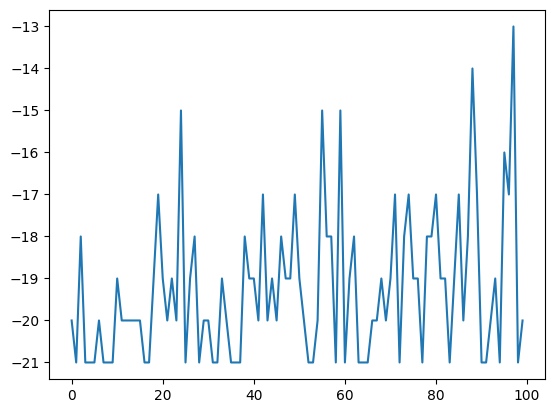

In [49]:
import matplotlib.pyplot as plt

plt.plot(reward_log)


In [50]:
window_size = 100

i = 0
# Initialize an empty list to store moving averages
moving_averages = []

# Loop through the array to consider
# every window of size 3
while i < len(reward_log) - window_size + 1:

    # Store elements from i to i+window_size
    # in list to get the current window
    window = reward_log[i : i + window_size]

    # Calculate the average of current window
    window_average = round(sum(window) / window_size, 2)

    # Store the average of current
    # window in moving average list
    moving_averages.append(window_average)

    # Shift window to right by one position
    i += 1

print(moving_averages)

[-19.28]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


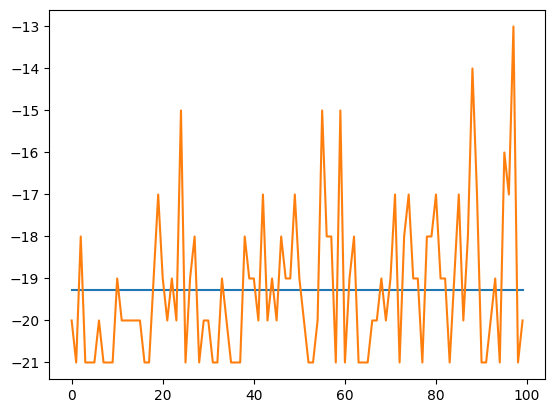

In [57]:
x = np.arange(100)
plt.plot(x ,moving_averages*100)
plt.plot(x ,reward_log)
